--- GENERANDO REGÍMENES DE MOVILIDAD (nu) ---

1. Array 'nu_corta' (Primeros 10 valores):
[ 0.5  -0.14  0.65  1.52 -0.23 -0.23  1.58  0.77 -0.47  0.54]
   -> Máximo desplazamiento: 3.85 km

2. Array 'nu_larga' (Primeros 10 valores):
[-10.42  -7.29   3.12   7.3  -48.76  26.76 -28.23   1.37  13.78  15.49]
   -> Máximo desplazamiento: 524.05 km (¡Mira este salto!)


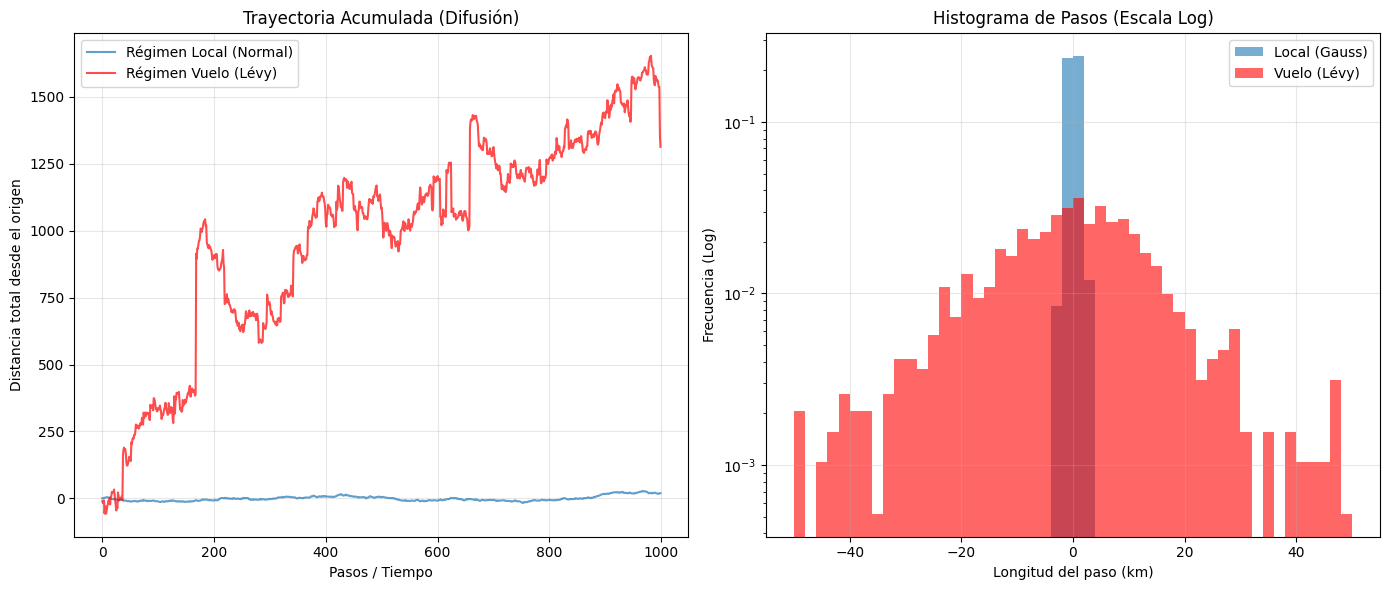

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

# Configuración
N_MUESTRAS = 1000  # Cantidad de movimientos (personas o pasos)
SEMILLA = 42
np.random.seed(SEMILLA)

print("--- GENERANDO REGÍMENES DE MOVILIDAD (nu) ---")

# 1. REGÍMEN E1: CORTA DISTANCIA (Difusión Browniana/Local)
# Usamos una Distribución Normal estándar
# Media = 0, Desviación Estándar = 1 km (por ejemplo)
nu_corta = np.random.normal(loc=0, scale=1, size=N_MUESTRAS)

print(f"\n1. Array 'nu_corta' (Primeros 10 valores):")
print(np.round(nu_corta[:10], 2))
print(f"   -> Máximo desplazamiento: {np.max(np.abs(nu_corta)):.2f} km")


# 2. REGÍMEN E2: LARGA DISTANCIA (Vuelo de Lévy)
# Usamos una Distribución Estable de Lévy
# alpha = 1.5 (Esto es clave: si es < 2, tiene varianza infinita teórica)
alpha = 1.5
beta = 0    # Simetría
nu_larga = levy_stable.rvs(alpha=alpha, beta=beta, size=N_MUESTRAS)

# *Ajuste de escala visual*: Multiplicamos para simular la escala de "cientos de km"
# Aunque matemáticamente la distribución ya tiene colas pesadas.
nu_larga = nu_larga * 10

print(f"\n2. Array 'nu_larga' (Primeros 10 valores):")
print(np.round(nu_larga[:10], 2))
print(f"   -> Máximo desplazamiento: {np.max(np.abs(nu_larga)):.2f} km (¡Mira este salto!)")

# ---------------------------------------------------------
# VISUALIZACIÓN COMPARATIVA
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# A. Trayectorias (Caminatas Aleatorias)
# Suma acumulada para ver cómo se alejan del origen
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(nu_corta), label='Régimen Local (Normal)', alpha=0.7)
plt.plot(np.cumsum(nu_larga), label='Régimen Vuelo (Lévy)', alpha=0.7, color='red')
plt.title("Trayectoria Acumulada (Difusión)")
plt.ylabel("Distancia total desde el origen")
plt.xlabel("Pasos / Tiempo")
plt.legend()
plt.grid(True, alpha=0.3)

# B. Histogramas (La Cola Pesada)
plt.subplot(1, 2, 2)
# Usamos escala logarítmica para ver los eventos raros
plt.hist(nu_corta, bins=50, density=True, alpha=0.6, label='Local (Gauss)', range=(-50, 50))
plt.hist(nu_larga, bins=50, density=True, alpha=0.6, color='red', label='Vuelo (Lévy)', range=(-50, 50))
plt.yscale('log') # ESCALA LOGARÍTMICA ES CLAVE AQUÍ
plt.title("Histograma de Pasos (Escala Log)")
plt.xlabel("Longitud del paso (km)")
plt.ylabel("Frecuencia (Log)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()